# Prueba de Concepto: Análisis del Conflicto de Crimea (2014)

Autor: Diego Sánchez Escribano

Fecha: 8 de julio de 2025

## 1. Objetivo
Esta prueba de concepto tiene como objetivo evaluar la capacidad de predecir conflictos armados a partir de los movimientos de los mercados financieros. Para la prueba de concepto se utilizará el conflicto armado de Crimea en 2014. Se establece como "tiempo cero" (t-0) la fecha del 27 de febrero de 2014. Este día marca un punto de inflexión fáctico con la toma del parlamento de Crimea por fuerzas armadas pro-rusas, un evento reportado por fuentes contemporáneas fiables (BBC News, 2014). El período de análisis para la recolección de datos comprenderá los 24 meses inmediatamente anteriores a esta fecha: del 27 de febrero de 2012 al 26 de febrero de 2014. Este caso ha sido seleccionado por su idoneidad para la hipótesis del proyecto. Se alinea con la definición de conflicto interestatal del UCDP (Uppsala Conflict Data Program, 2024) y cumple con los criterios clave para una PoC exitosa:

- Disponibilidad de datos: Existe una alta disponibilidad de datos digitales financieros y de noticias para el período.
- Cronología clara: La operación militar tuvo un inicio súbito y bien definido, facilitando el análisis.

## 2. Configuración y adquisición de los datos
Los datos para la PoC se obtuvieron de Yahoo Finance y de Investing.com, los cuales se cargaron como un CSV. Se toman datos de los siguientes indicadores entre el 27 de febrero de 2012 y el 27 de febrero de 2014, momento en el que se produjo la crisis de Crimea:

- Rublo
- Brent
- VIX
- Gold
- DAX
- Stoxx

Una vez recopilados todos los datos, se combinan en un solo DataFrame para su análisis.

In [ ]:
import pandas as pd
import yfinance as yf
from datetime import datetime

# --- 1. Definición de Parámetros ---

START_DATE = "2012-02-27"
END_DATE = "2014-02-27"  

# Definimos el tiempo cero para usarlo más adelante en los gráficos
T_ZERO = pd.to_datetime("2014-02-27")

# Creamos un diccionario con todos los tickers que queremos de Yahoo Finance
TICKERS = {
    "rub": "RUB=X",
    "brent": "BZ=F",
    "vix": "^VIX",
    "gold": "GC=F",
    "dax": "^GDAXI",
    "stoxx": "^STOXX50E"
}

# --- 2. Carga del Índice MOEX  ---

try:
    moex_df = pd.read_csv("data/moex_crimea.csv")
    print("✅ Índice MOEX cargado correctamente.")
    # print(moex_df.head()) # Descomentar para inspeccionar
except FileNotFoundError:
    print("❌ ERROR: No se encontró el archivo 'data/MOEX.csv'. Asegúrate de que el archivo existe en esa carpeta.")

# --- 3. Descarga de Datos desde yfinance ---

# Usamos un diccionario para almacenar todos los dataframes descargados
dataframes = {}

for name, ticker in TICKERS.items():
    print(f"Descargando datos para {name} ({ticker})...")
    df = yf.download(ticker, start=START_DATE, end=END_DATE)
    if not df.empty:
        dataframes[name] = df
        print(f"✅ Datos para {name} descargados. {len(df)} filas.")
    else:
        print(f"⚠️ No se encontraron datos para {name} ({ticker}).")

# Acceso a un dataframe (ejemplo: Rublo)
print("\n--- Inspección Rápida de un DataFrame Descargado (Rublo) ---")
if 'rub' in dataframes:
    rub_df = dataframes['rub']
    print(rub_df.head())
    date_close = rub_df[["Close"]]
    print(date_close.head())

/var/folders/3m/jcdgmg5j2c169r0054176rm40000gn/T/ipykernel_39345/2011004496.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=START_DATE, end=END_DATE)
[*********************100%***********************]  1 of 1 completed
/var/folders/3m/jcdgmg5j2c169r0054176rm40000gn/T/ipykernel_39345/2011004496.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=START_DATE, end=END_DATE)
[*********************100%***********************]  1 of 1 completed
/var/folders/3m/jcdgmg5j2c169r0054176rm40000gn/T/ipykernel_39345/2011004496.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=START_DATE, end=END_DATE)
[*********************100%***********************]  1 of 1 completed
/var/folders/3m/jcdgmg5j2c169r0054176rm40000gn/T/ipykernel_39345/2011004496.py:39: FutureWarning: YF.download() has changed argument 

✅ Índice MOEX cargado correctamente.
Descargando datos para rub (RUB=X)...
✅ Datos para rub descargados. 522 filas.
Descargando datos para brent (BZ=F)...
✅ Datos para brent descargados. 485 filas.
Descargando datos para vix (^VIX)...
✅ Datos para vix descargados. 503 filas.
Descargando datos para gold (GC=F)...
✅ Datos para gold descargados. 503 filas.
Descargando datos para dax (^GDAXI)...
✅ Datos para dax descargados. 505 filas.
Descargando datos para stoxx (^STOXX50E)...
✅ Datos para stoxx descargados. 497 filas.

--- Inspección Rápida de un DataFrame Descargado (Rublo) ---
Price           Close       High        Low       Open Volume
Ticker          RUB=X      RUB=X      RUB=X      RUB=X  RUB=X
Date                                                         
2012-02-27  29.140200  29.201000  28.941999  29.140200      0
2012-02-28  28.998199  29.117001  28.831200  28.994200      0
2012-02-29  28.998199  29.228701  28.903200  28.998199      0
2012-03-01  29.188200  29.379000  29.002001

## 3. Limpieza y unificación de los datos
Antes de ser analizados se procede a limpiar los datos obtenidos. Dado que las fechas de apertura y cierre de los mercados no siempre coindice, hay un desfase entre las fechas de los datos descargados.

In [11]:
from pandas import DataFrame

print("Iniciando Limpieza y Unificación de Datos...")

# --- 1. Definición de Nombres de Columna ---
# Creamos un diccionario para mapear nuestros nombres cortos a los nombres finales
COLUMN_NAMES = {
    "moex": "moex",
    "rub": "rub",
    "brent": "brent",
    "vix": "vix",
    "gold": "gold",
    "dax": "dax",
    "stoxx": "stoxx"
}


# --- 2. Preparar la lista para guardar los DataFrames limpios ---
cleaned_dfs = []

# --- 3. Limpiar el DataFrame del MOEX ---
moex_df['Price'] = moex_df['Price'].str.replace(',', '', regex=False)
moex_df['Price'] = moex_df['Price'].astype(float)
moex_df['Date'] = pd.to_datetime(moex_df['Date'])
moex_df = moex_df.set_index('Date')
moex_clean = moex_df[['Price']].rename(columns={'Price': COLUMN_NAMES['moex']})
cleaned_dfs.append(moex_clean)
print(f"✅ DataFrame de '{COLUMN_NAMES['moex']}' limpiado y estandarizado.")

# --- 4. Limpiar todos los DataFrames de yfinance en un bucle ---
for name, df in dataframes.items():
    df.index = pd.to_datetime(df.index)
    final_col_name = COLUMN_NAMES[name] 
    close_values = df['Close'].values
    cleaned_df = pd.DataFrame(data=close_values, index=df.index, columns=[final_col_name])
    cleaned_dfs.append(cleaned_df)
    print(f"✅ DataFrame de '{final_col_name}' limpiado y estandarizado.")

# --- 5. Unir todos los DataFrames limpios en una única tabla maestra ---
master_df = pd.concat(cleaned_dfs, axis=1)

# --- 6. Manejar los valores nulos (NaN) ---
master_df = master_df.fillna(method='ffill')
master_df = master_df.fillna(method='bfill')

# --- 7. Inspección Final ---
print("\n--- Proceso de Unificación Completado ---")
print("Dimensiones de la tabla maestra:", master_df.shape)
print("\nPrimeras 5 filas de la tabla maestra con nombres finales:")
print(master_df.head())

Iniciando Limpieza y Unificación de Datos...
✅ DataFrame de 'moex' limpiado y estandarizado.
✅ DataFrame de 'rub' limpiado y estandarizado.
✅ DataFrame de 'brent' limpiado y estandarizado.
✅ DataFrame de 'vix' limpiado y estandarizado.
✅ DataFrame de 'gold' limpiado y estandarizado.
✅ DataFrame de 'dax' limpiado y estandarizado.
✅ DataFrame de 'stoxx' limpiado y estandarizado.

--- Proceso de Unificación Completado ---
Dimensiones de la tabla maestra: (523, 7)

Primeras 5 filas de la tabla maestra con nombres finales:
               moex        rub       brent        vix         gold  \
Date                                                                 
2012-02-27  1592.66  29.140200  124.169998  18.190001  1773.599976   
2012-02-28  1574.10  28.998199  121.550003  17.959999  1787.000000   
2012-02-29  1597.67  28.998199  122.660004  18.430000  1709.900024   
2012-03-01  1595.78  29.188200  126.199997  17.260000  1721.099976   
2012-03-02  1608.08  29.120199  123.650002  17.290001  1

/var/folders/3m/jcdgmg5j2c169r0054176rm40000gn/T/ipykernel_39345/2689169056.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  master_df = master_df.fillna(method='ffill')
/var/folders/3m/jcdgmg5j2c169r0054176rm40000gn/T/ipykernel_39345/2689169056.py:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  master_df = master_df.fillna(method='bfill')


## 4. Gráficos de los índices individuales
Con los datos ya preparados se procede a crear gráficas para cada uno de los índices.

### 4.1 Índice VIX

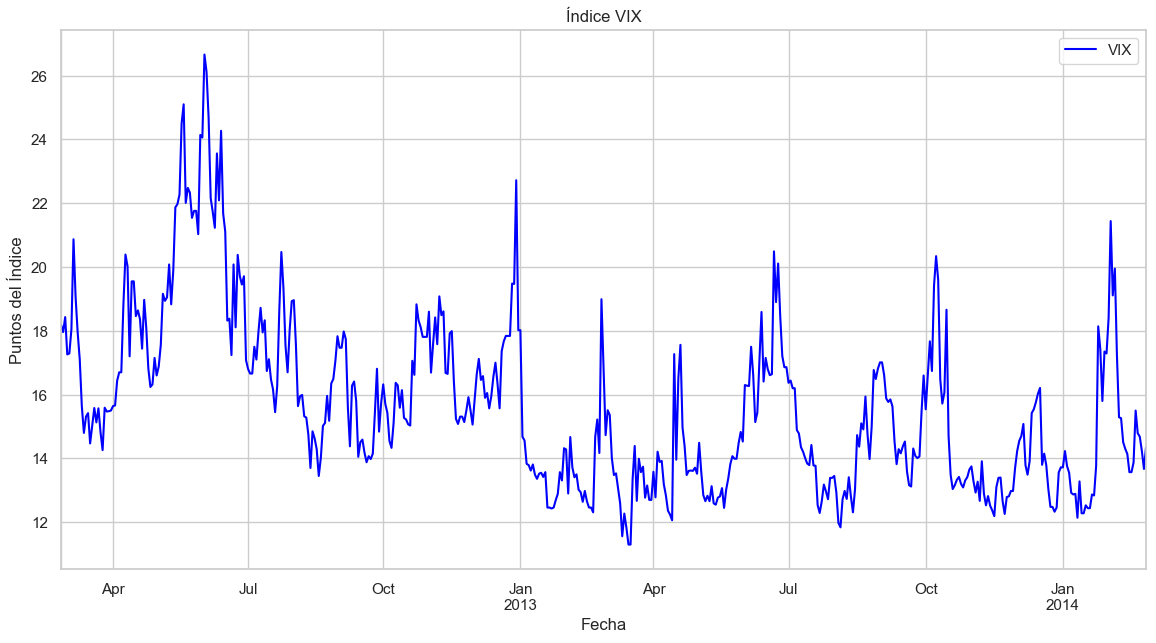

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer un estilo
sns.set_theme(style="whitegrid")

# Crear la figura
plt.figure(figsize=(14, 7))

# Graficar los datos
master_df['vix'].plot(label='VIX', color='blue')

# Añadir títulos
plt.title('Índice VIX')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Puntos del Índice', fontsize=12)
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()



### 4.2 Índice RUB/USD

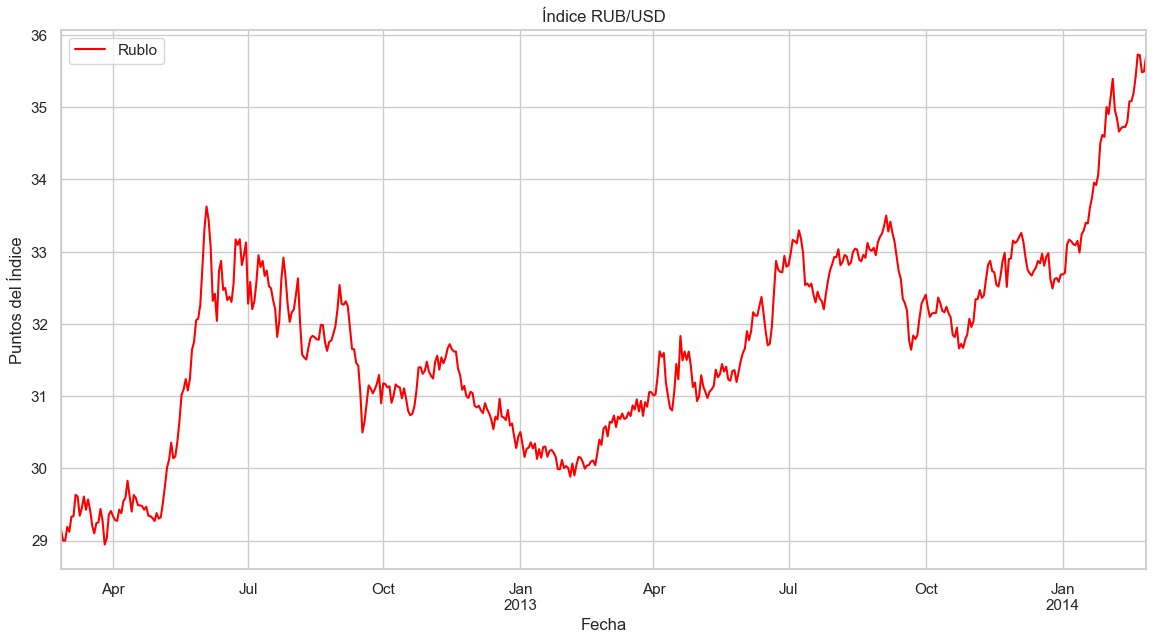

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer un estilo
sns.set_theme(style="whitegrid")

# Crear la figura
plt.figure(figsize=(14, 7))

# Graficar los datos
master_df['rub'].plot(label='Rublo', color='red')

# Añadir títulos
plt.title('Índice RUB/USD')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Puntos del Índice', fontsize=12)
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

### 4.3 Índice Brent

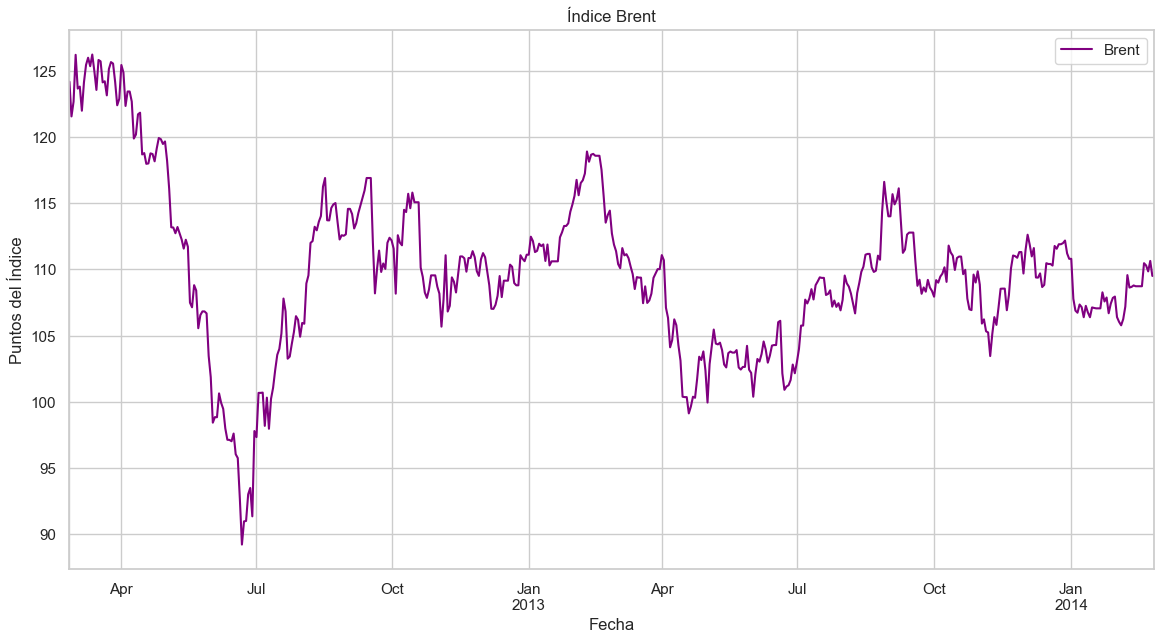

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer un estilo
sns.set_theme(style="whitegrid")

# Crear la figura
plt.figure(figsize=(14, 7))

# Graficar los datos
master_df['brent'].plot(label='Brent', color='purple')

# Añadir títulos
plt.title('Índice Brent')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Puntos del Índice', fontsize=12)
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

### 4.4 Índice Oro

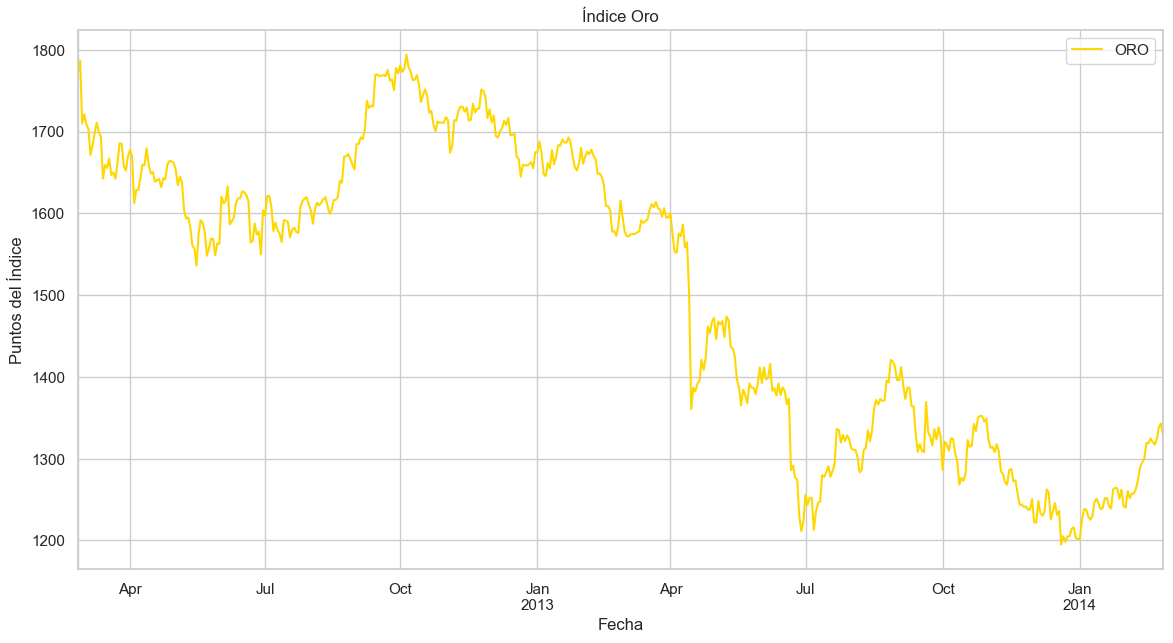

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer un estilo
sns.set_theme(style="whitegrid")

# Crear la figura
plt.figure(figsize=(14, 7))

# Graficar los datos
master_df['gold'].plot(label='ORO', color='gold')

# Añadir títulos
plt.title('Índice Oro')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Puntos del Índice', fontsize=12)
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

### 4.5 Índice DAX

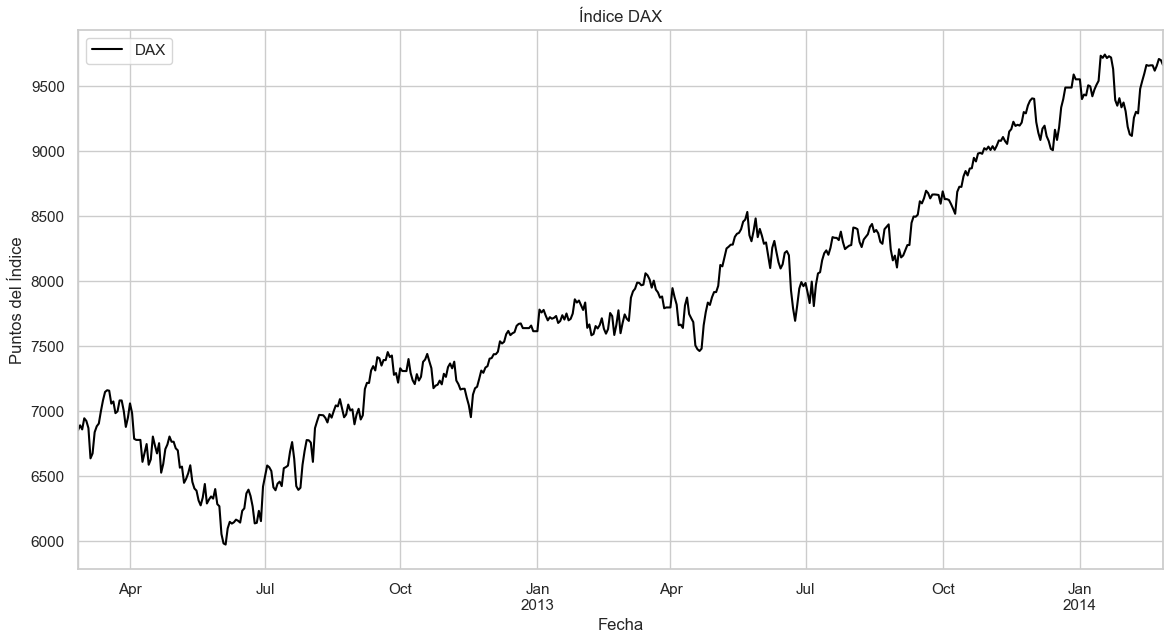

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer un estilo
sns.set_theme(style="whitegrid")

# Crear la figura
plt.figure(figsize=(14, 7))

# Graficar los datos
master_df['dax'].plot(label='DAX', color='black')

# Añadir títulos
plt.title('Índice DAX')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Puntos del Índice', fontsize=12)
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

### 4.6 Índice Stoxx

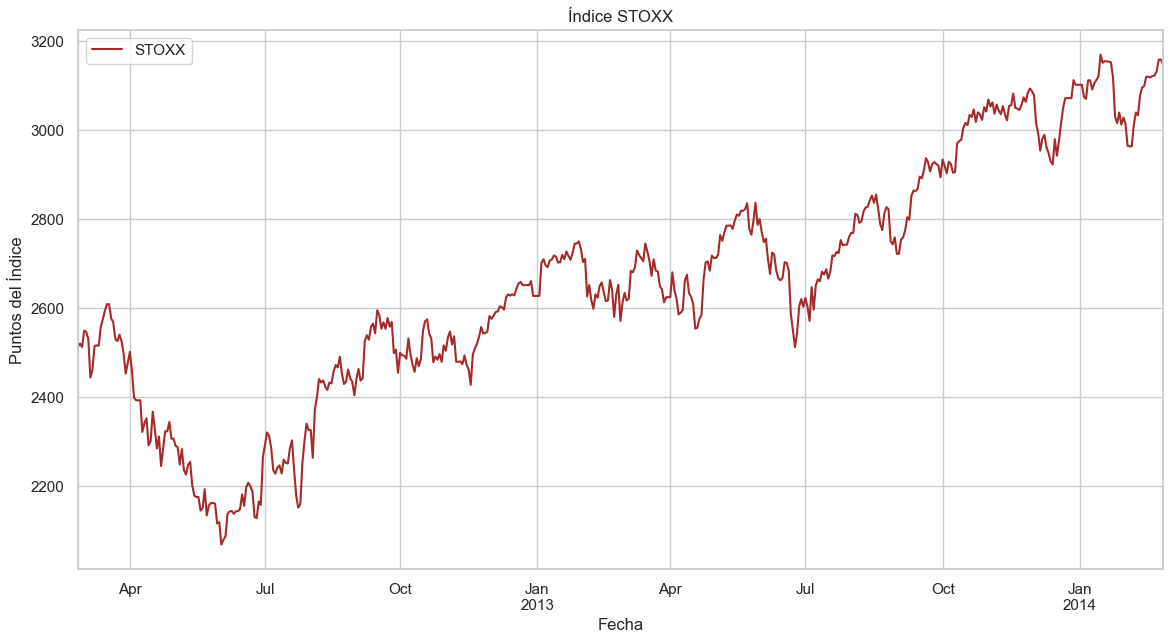

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer un estilo
sns.set_theme(style="whitegrid")

# Crear la figura
plt.figure(figsize=(14, 7))

# Graficar los datos
master_df['stoxx'].plot(label='STOXX', color='brown')

# Añadir títulos
plt.title('Índice STOXX')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Puntos del Índice', fontsize=12)
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

### 4.7 Índice MOEX

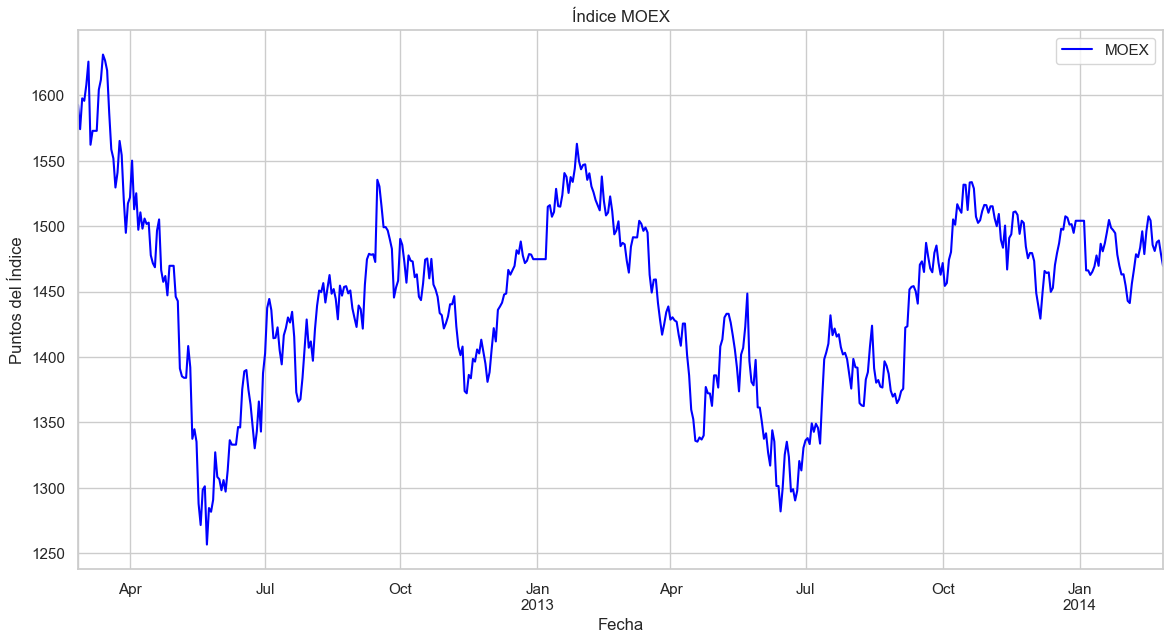

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer un estilo
sns.set_theme(style="whitegrid")

# Crear la figura
plt.figure(figsize=(14, 7))

# Graficar los datos
master_df['moex'].plot(label='MOEX', color='blue')

# Añadir títulos
plt.title('Índice MOEX')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Puntos del Índice', fontsize=12)
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

## 5. Gráfico de los índices normalizados

Para poder analizar los datos visualmente, se crea un gráfico con la evolución de los precios de los mercados, normalizados en Base 100 para poder compararlos correctamente y sacar conclusiones.

--- Primeras 5 filas de la tabla normalizada (todas empiezan en 100) ---
                  moex         rub       brent         vix        gold  \
Date                                                                     
2012-02-27  100.000000  100.000000  100.000000  100.000000  100.000000   
2012-02-28   98.834654   99.512700   97.889993   98.735561  100.755527   
2012-02-29  100.314568   99.512700   98.783930  101.319405   96.408438   
2012-03-01  100.195899  100.164722  101.634854   94.887299   97.039919   
2012-03-02  100.968192   99.931365   99.581222   95.052229   96.346418   

                   dax       stoxx  
Date                                
2012-02-27  100.000000  100.000000  
2012-02-28  100.555212  100.265012  
2012-02-29  100.094604   99.962199  
2012-03-01  101.345625  101.416594  
2012-03-02  101.047799  101.317114  


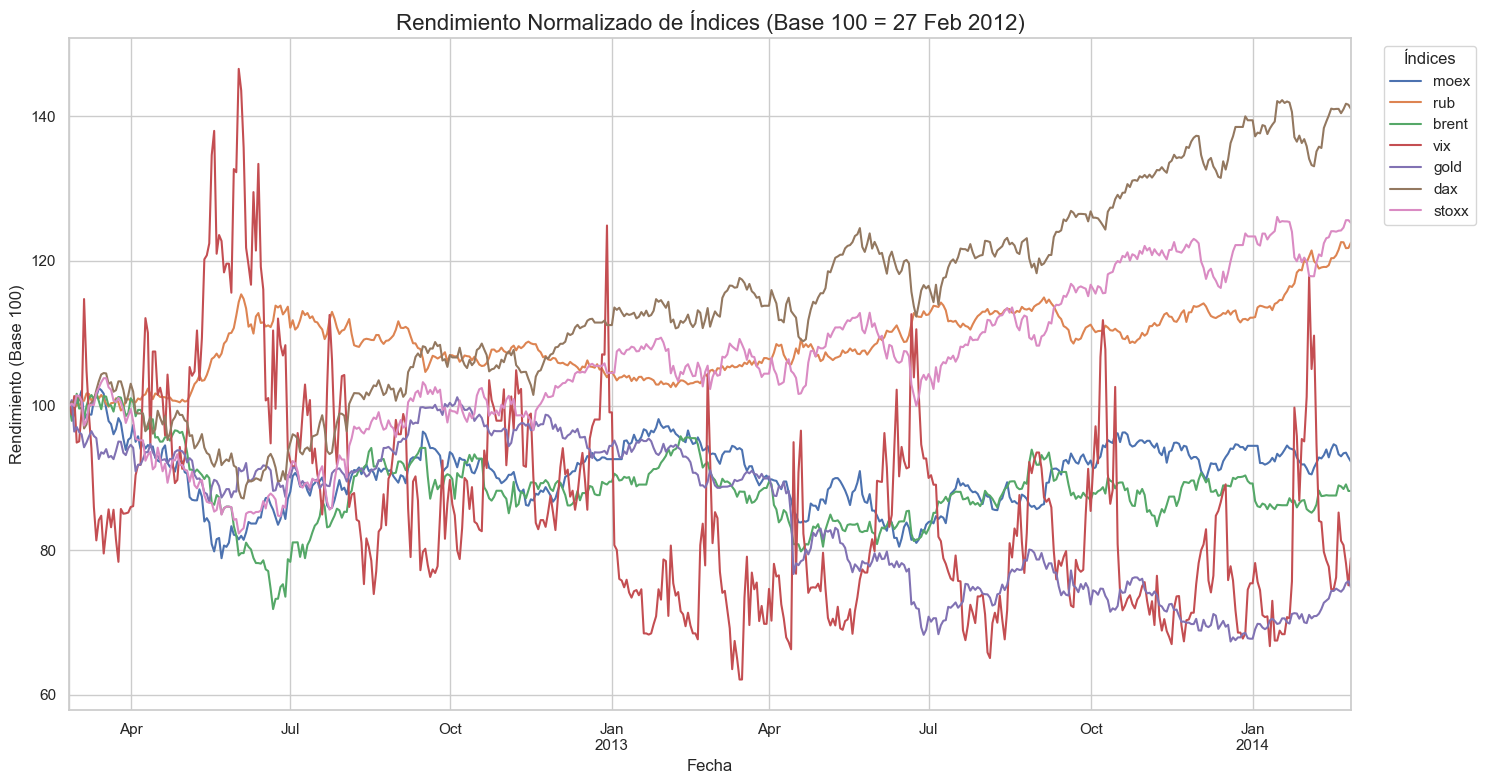

In [19]:
# --- Paso 1: Crear el DataFrame Normalizado ---

# Tomamos la primera fila de nuestra tabla como el punto de partida (base 100)
# .iloc[0] selecciona la primera fila por su posición
base_values = master_df.iloc[0]

# Dividimos cada valor en la tabla por su valor base y multiplicamos por 100
normalized_df = (master_df / base_values) * 100

print("--- Primeras 5 filas de la tabla normalizada (todas empiezan en 100) ---")
print(normalized_df.head())


# --- Paso 2: Graficar TODOS los índices juntos ---

# Creamos la figura y los ejes para tener más control
fig, ax = plt.subplots(figsize=(15, 8))

# Graficamos el DataFrame normalizado completo. Pandas se encarga de pintar una línea por cada columna.
normalized_df.plot(ax=ax, linewidth=1.5)

# --- Paso 3: Añadir los títulos ---

ax.set_title('Rendimiento Normalizado de Índices (Base 100 = 27 Feb 2012)', fontsize=16)
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Rendimiento (Base 100)', fontsize=12)
ax.grid(True)

# --- Paso 4: Ajustar la leyenda ---
# Movemos la leyenda fuera del área del gráfico para que no tape las líneas
ax.legend(title='Índices', bbox_to_anchor=(1.02, 1), loc='upper left')

# Ajusta el layout para que la leyenda no se corte
plt.tight_layout()
plt.show()

### 5.1 Gráfica con los índices predictores del evento
De la gráfica anterior se observa que los índices que pueden tomarse como predictores del evento son el MOEX y el valor del Rublo. Se crea una última gráfica con los índices MOEX, Rublo y STOXX50E. En esta gráfica se observa que mientras que el Rublo y el mercado europeo muestran un crecimiento similar, el MOEX se desprende de este crecimiento alrededor del año 2013, lo que puede interpretarse como un indicador predictivo de la situación política en Crimea.

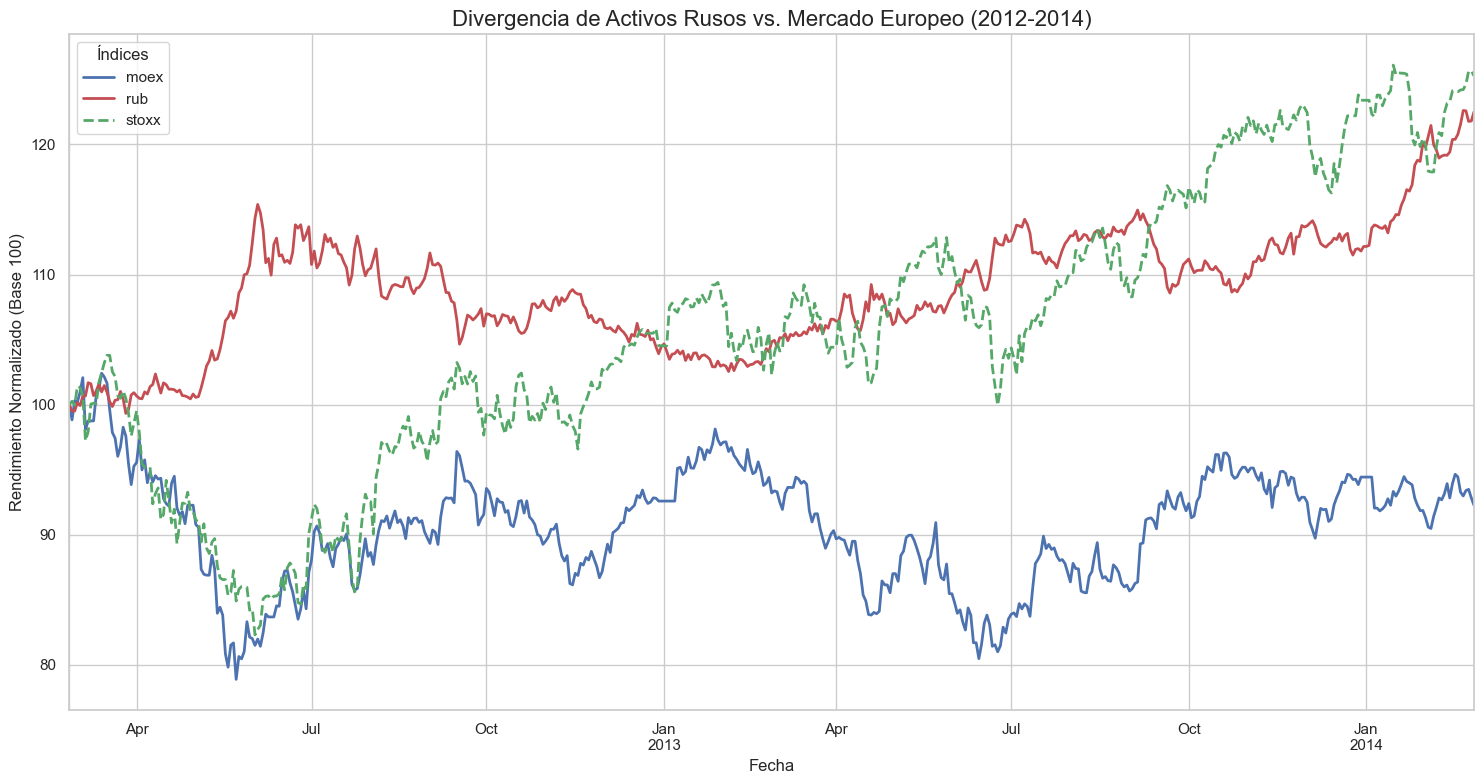

In [20]:
# --- Paso 1: Seleccionar las columnas de interés ---
# Creamos una lista con los indicadores que queremos comparar
indicadores_clave = ['moex', 'rub', 'stoxx']

# Seleccionamos solo esas columnas de nuestro dataframe normalizado
df_comparativo = normalized_df[indicadores_clave]

# --- Paso 2: Graficar los índices seleccionados ---
fig, ax = plt.subplots(figsize=(15, 8))

# Graficamos nuestro nuevo dataframe comparativo
df_comparativo.plot(ax=ax, linewidth=2, style=['b-', 'r-', 'g--']) # Estilos de línea para diferenciar

# --- Paso 3: Añadir los títulos ---

ax.set_title('Divergencia de Activos Rusos vs. Mercado Europeo (2012-2014)', fontsize=16)
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Rendimiento Normalizado (Base 100)', fontsize=12)
ax.grid(True)

# --- Paso 4: Ajustar la leyenda ---
ax.legend(title='Índices')

plt.tight_layout()
plt.show()

## 6. Conclusiones
El análisis visual de los datos valida la hipótesis fundamental de este proyecto para el caso de estudio de Crimea 2014. Se ha demostrado que es posible identificar señales de alerta temprana en los mercados financieros a través de tres observaciones clave:

1. Señal Predictiva de Renta Variable: El índice bursátil ruso (MOEX) muestra un claro desacople respecto a sus pares europeos (STOXX50E/DAX) a partir de finales de 2013. Mientras los mercados europeos continuaban su tendencia alcista, el MOEX se estancó y comenzó a caer semanas antes del "tiempo cero", indicando una aversión al riesgo específica sobre Rusia.

2. Señal Predictiva de Divisa: De forma aún más pronunciada, el tipo de cambio RUB/USD experimentó una subida significativa en las semanas previas al conflicto. Este movimiento indica un fuerte debilitamiento del Rublo, consistente con una fuga de capitales ante la creciente tensión geopolítica.

3. Señal Confirmatoria del Evento: A diferencia de los indicadores rusos, el Índice VIX (no mostrado en el último gráfico, pero sí en el general) no anticipó el conflicto. Sin embargo, reaccionó con un pico súbito justo en el "tiempo cero", confirmando el momento exacto del shock en los mercados globales.

Por lo tanto, se concluye que para este conflicto específico, los mercados financieros locales sí proporcionaron una señal predictiva clara, mientras que los indicadores de riesgo global sirvieron como confirmación del evento.